In [9]:
import sklearn as sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import pandas as pd

In [7]:
knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [11]:
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
len(X_train), len(X_test)

(74, 25)

In [22]:
len(y_train), len(y_test)

(74, 25)

In [23]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [24]:
lr_fit.coef_

array([    80.06722955, -14514.59565707,  -3638.99884169,   3638.99884169])

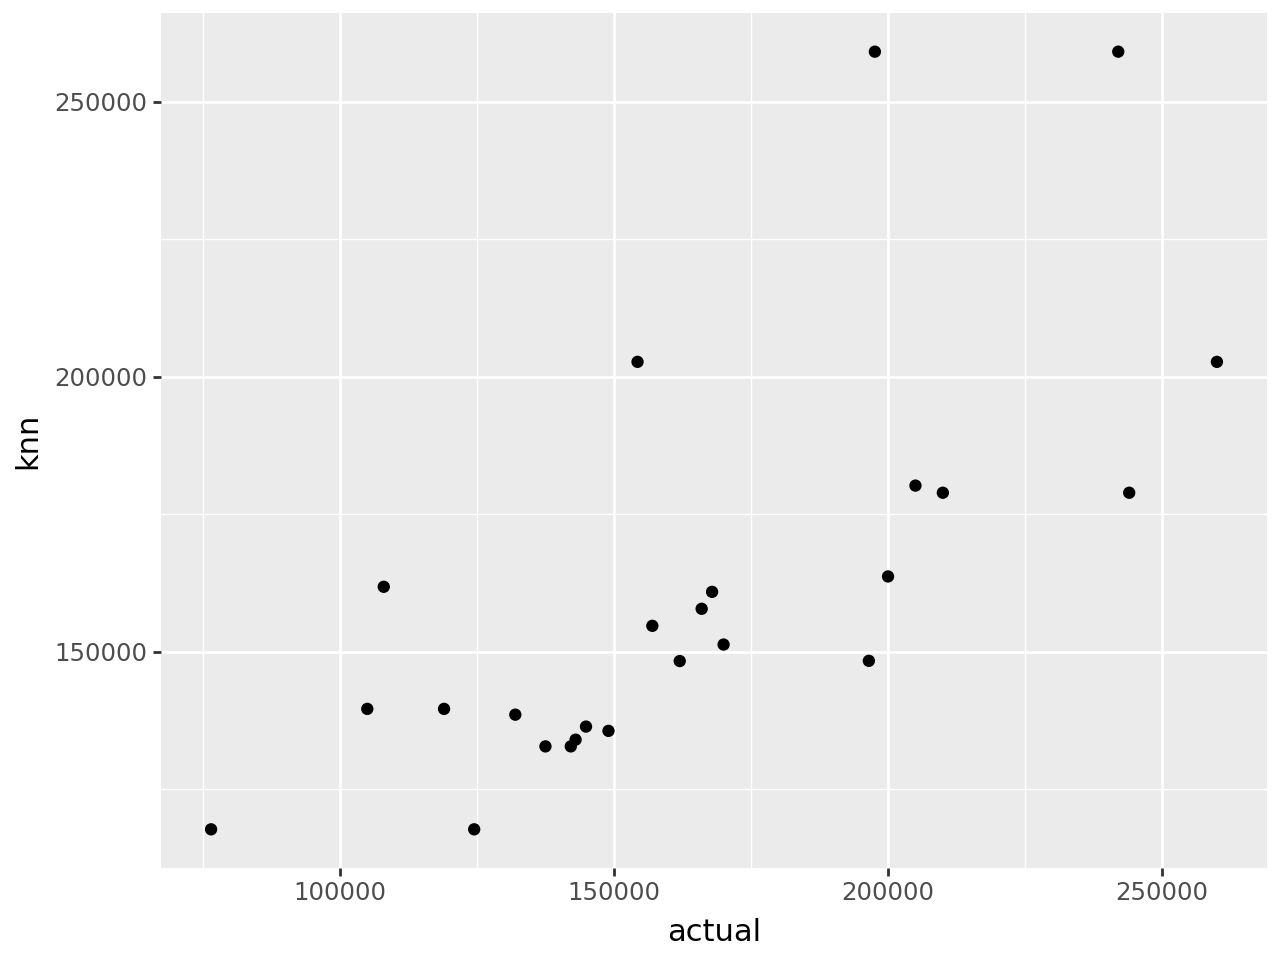

In [33]:
from plotnine import *


eval_data = pd.DataFrame({
    'actual' : y_test,
    'knn': y_pred_knn,
    'lr': y_pred_lr,
    'dt': y_pred_dt
})

(ggplot(eval_data, aes(x='actual', y='knn'))
+ geom_point()
)

In [25]:
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt)

(1062550291.6304, 593179650.9524939, 2241498013.888889)

In [30]:
final_model = lr.fit(X,y)
final_model.coef_

array([    74.37717581, -13083.50151923,  -7484.17760684,   7484.17760684])